In [1]:
!pip install networkx
!pip install --config-settings="--global-option=build_ext" --config-settings="--global-option=-I$(brew --prefix graphviz)/include/" --config-settings="--global-option=-L$(brew --prefix graphviz)/lib/" pygraphviz


In [2]:
import os
import random
import heapq
from itertools import combinations
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from IPython.core.display import Image

basepath = os.path.join('..', 'images')
if not os.path.exists(basepath):
    os.makedirs(os.path.join(basepath), exist_ok=True)

# Aufgabe 03 - Minimale Spannbäume
- Suchen Sie alle minimalen Spannbäume (MST) in folgendem Graph.
- Welche Kosten weisen diese auf?
- Stellen Sie die unterschiedlichen MST dar!
- Gegeben ein minimaler Spannbaum T von einem Graph G.
- Wie kann geprüft werden ob es weitere MST in G gibt oder ob T einzigartig ist?


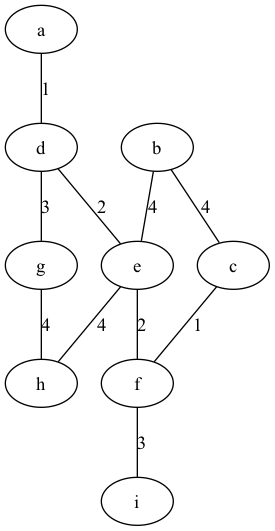

In [3]:
G = nx.Graph()
G.add_edge('a', 'd', weight=1)
G.add_edge('b', 'c', weight=4)
G.add_edge('b', 'e', weight=4)
G.add_edge('c', 'f', weight=1)
G.add_edge('d', 'e', weight=2)
G.add_edge('d', 'g', weight=3)
G.add_edge('e', 'f', weight=2)
G.add_edge('e', 'h', weight=4)
G.add_edge('f', 'i', weight=3)
G.add_edge('g', 'h', weight=4)

g = to_agraph(G)
g.layout(prog='dot')

for edge in g.edges():
    edge.attr['label'] = edge.attr['weight']

graph_file = os.path.join(basepath, f'a03a_graph.png')
g.draw(graph_file, prog='dot', format='png')

display(Image(graph_file))

In [4]:
# Find MST using Kruskal's algorithm
mst = nx.minimum_spanning_tree(G, algorithm='kruskal')

# Function to find all MSTs
def find_all_msts(graph):
    mst_edges = list(nx.minimum_spanning_edges(G, algorithm='prim', data=True))
    msts = []

    def dfs(graph, edge_list, index):
        if len(edge_list) == len(G.nodes) - 1:
            tree = nx.Graph()
            tree.add_edges_from(edge_list)
            msts.append(tree)
            return

        if index >= len(mst_edges):
            return

        for i in range(index, len(mst_edges)):
            u, v, data = mst_edges[i]
            edge = (u, v, data['weight'])
            if nx.has_path(graph, u, v):
                continue
            graph.add_edge(u, v, weight=data['weight'])
            dfs(graph, edge_list + [edge], i + 1)
            graph.remove_edge(u, v)

    dfs(nx.Graph(), [], 0)
    return msts


# Get all MSTs
all_msts = find_all_msts(G)

NodeNotFound: Either source c or target f is not in G

In [ ]:
# Visualize MSTs
for i, tree in enumerate(all_msts, start=1):
    pos = nx.spring_layout(tree)
    plt.figure()
    nx.draw(tree, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    labels = nx.get_edge_attributes(tree, 'weight')
    nx.draw_networkx_edge_labels(tree, pos, edge_labels=labels)
    plt.title(f'MST {i}')
    plt.show()

# Display the cost of MSTs
cost = sum([data['weight'] for u, v, data in mst.edges(data=True)])
print(f"Cost of each MST: {cost}")